In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
data = pd.read_csv("../artifacts/raw/train.csv")

In [5]:
data.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,29580,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,Canceled
1,6325,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,Canceled
2,33899,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,Not_Canceled
3,720,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,Not_Canceled
4,22120,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,Not_Canceled


In [6]:
data.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='str')

In [7]:
data.drop(columns=["Unnamed: 0","Booking_ID"],inplace=True) # dropping unamed: 0 and booking id because these columns are not used while creating a model

In [8]:
data.shape

(25392, 18)

In [9]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(6419)

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
data.shape

(18973, 18)

In [14]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='str')

In [15]:
data.no_of_adults.value_counts()

no_of_adults
2    13741
1     3567
3     1554
0      100
4       11
Name: count, dtype: int64

In [16]:
data.no_of_children.value_counts()

no_of_children
0     17141
1      1090
2       729
3        11
10        1
9         1
Name: count, dtype: int64

In [17]:
data.no_of_weekend_nights.value_counts()

no_of_weekend_nights
0    8136
1    5377
2    5253
3      97
4      83
5      16
6      11
Name: count, dtype: int64

In [18]:
data.no_of_week_nights.value_counts()

no_of_week_nights
2     5246
1     5194
3     4108
4     1754
0     1320
5     1034
6      124
7       72
8       35
10      34
9       21
11      10
15       6
12       5
14       4
13       3
17       2
16       1
Name: count, dtype: int64

In [19]:
data.type_of_meal_plan.value_counts()

type_of_meal_plan
Meal Plan 1     14880
Not Selected     3204
Meal Plan 2       887
Meal Plan 3         2
Name: count, dtype: int64

In [20]:
data.required_car_parking_space.value_counts()

required_car_parking_space
0    18191
1      782
Name: count, dtype: int64

In [21]:
data.room_type_reserved.value_counts()

room_type_reserved
Room_Type 1    13693
Room_Type 4     3896
Room_Type 6      656
Room_Type 2      447
Room_Type 5      168
Room_Type 7      110
Room_Type 3        3
Name: count, dtype: int64

In [22]:
data.arrival_year.value_counts()

arrival_year
2018    16084
2017     2889
Name: count, dtype: int64

In [23]:
data.arrival_month.value_counts()

arrival_month
10    2383
9     2250
8     2180
12    1719
7     1686
11    1616
4     1497
3     1425
6     1370
5     1363
2      944
1      540
Name: count, dtype: int64

In [24]:
data.market_segment_type.value_counts()

market_segment_type
Online           14434
Offline           3158
Corporate         1057
Complementary      252
Aviation            72
Name: count, dtype: int64

In [25]:
data.repeated_guest.value_counts()

repeated_guest
0    18378
1      595
Name: count, dtype: int64

In [26]:
data.no_of_previous_cancellations.value_counts()

no_of_previous_cancellations
0     18778
1        98
2        33
3        27
11       17
5        10
4         8
13        1
6         1
Name: count, dtype: int64

In [27]:
data.booking_status.value_counts() # Data is imbalanced because Not_Canceled: 13493, Canceled: 5480

booking_status
Not_Canceled    13493
Canceled         5480
Name: count, dtype: int64

In [28]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='str')

In [29]:
# Specifying categorical columns
cat_cols = ['type_of_meal_plan','required_car_parking_space','room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = data.columns.difference(cat_cols).tolist()

In [30]:
# Data analysis
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,Canceled
1,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,Canceled
2,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,Not_Canceled
3,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,Not_Canceled
4,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,Not_Canceled


In [31]:
# Univariate Analysis - it is the simplest form of quantitative data analysis, focusing on describing, summarizing, and identifying patterns within a single variable at a time

In [32]:
def num_plot_dist(df,num_features):
    fig, axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes = [axes]
    for i,column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0],kde=True,palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df,x=column,ax=axes[i][1],palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    plt.tight_layout()
    plt.show()

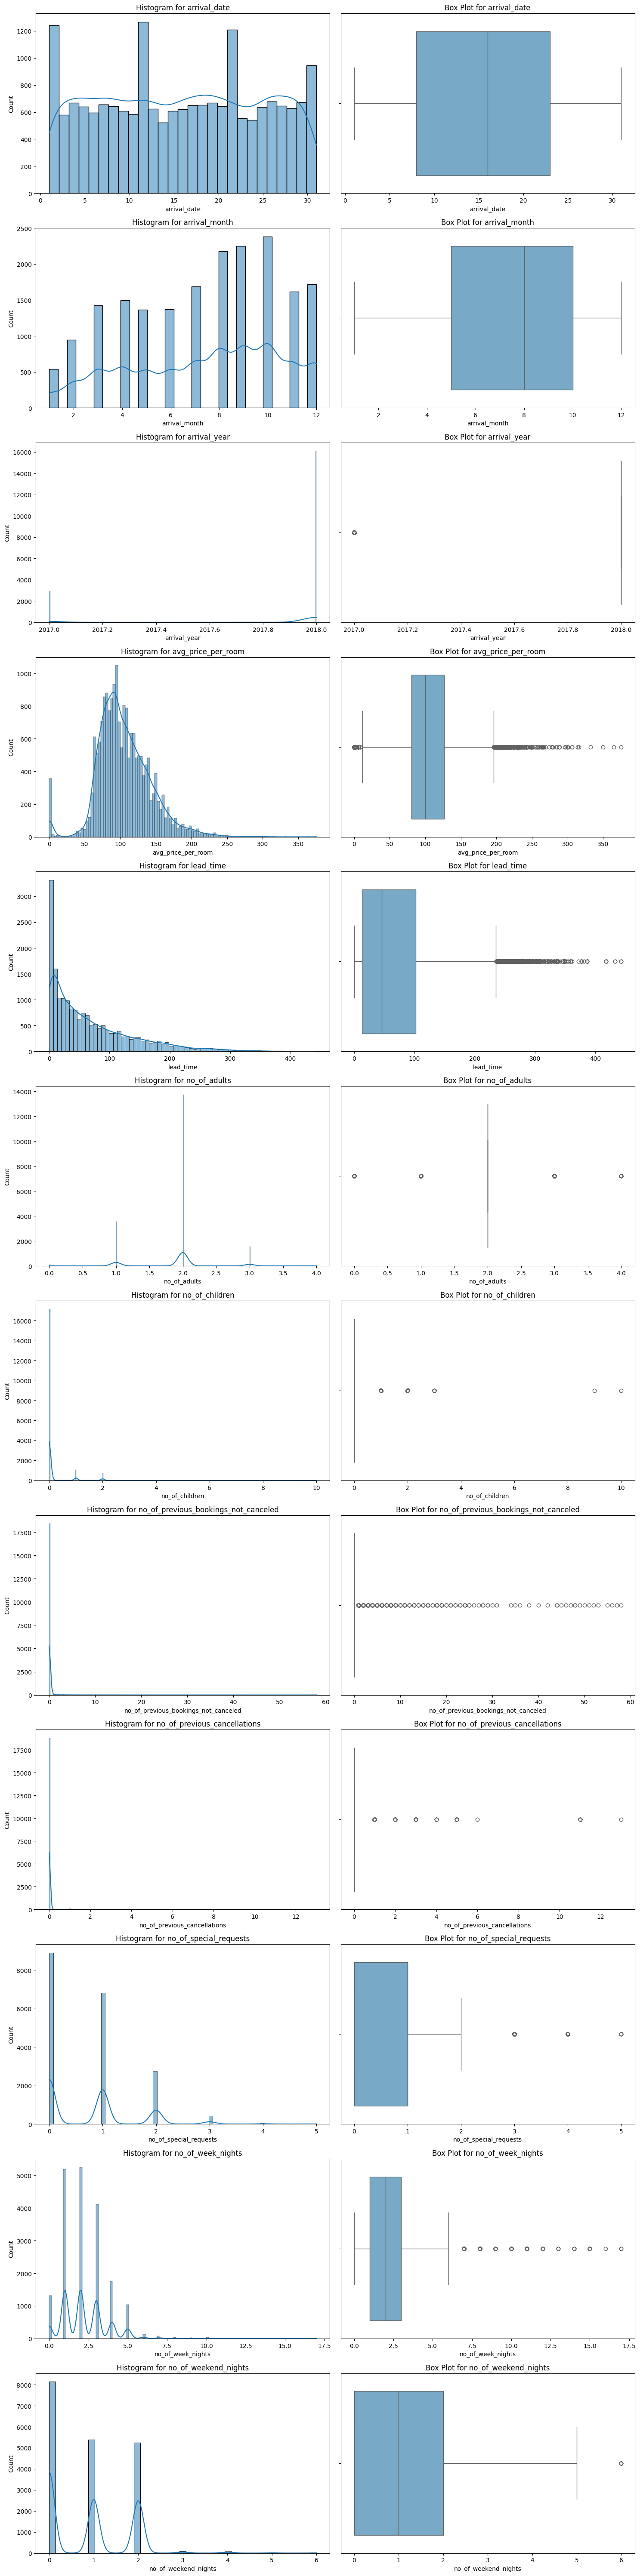

In [33]:
num_plot_dist(data,num_cols)

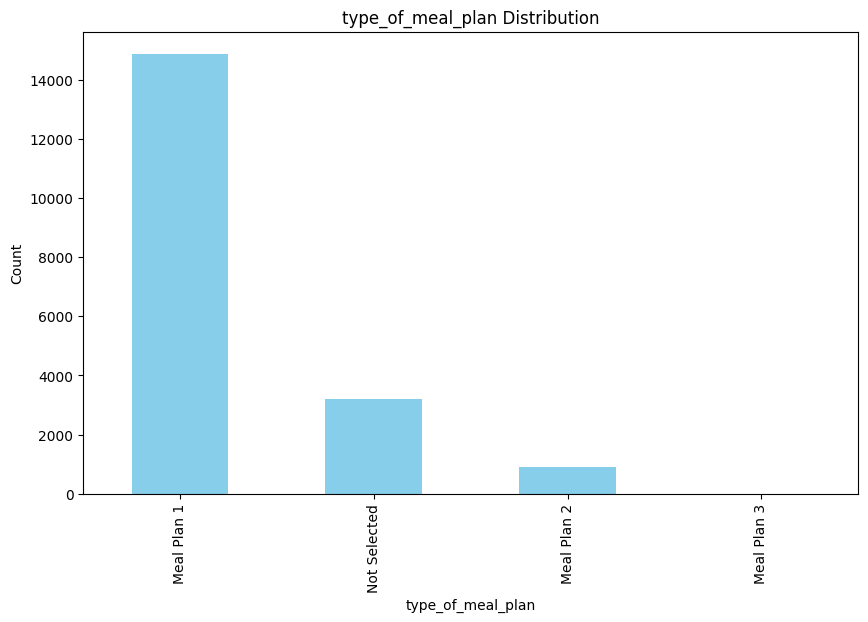

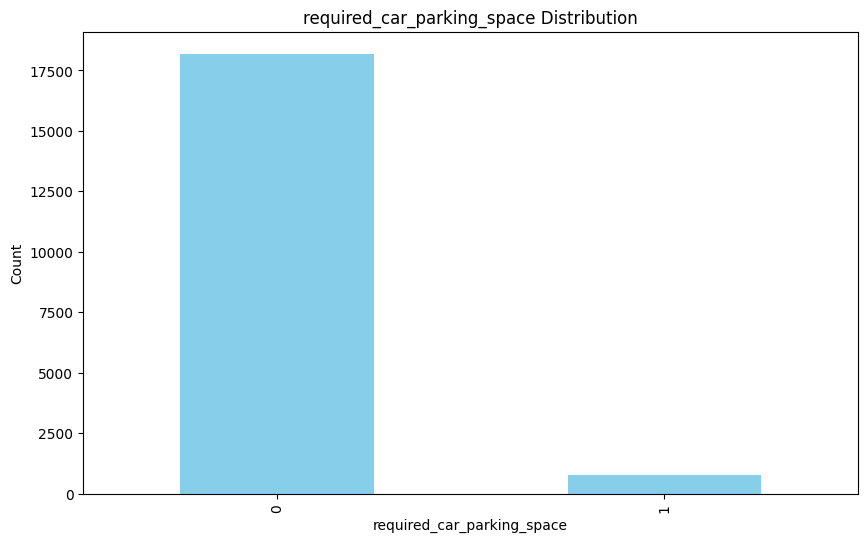

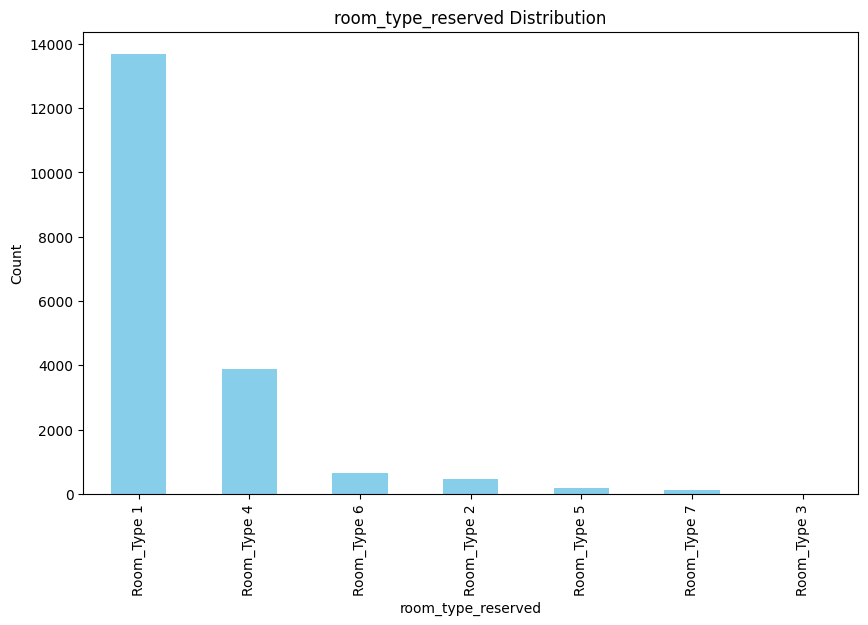

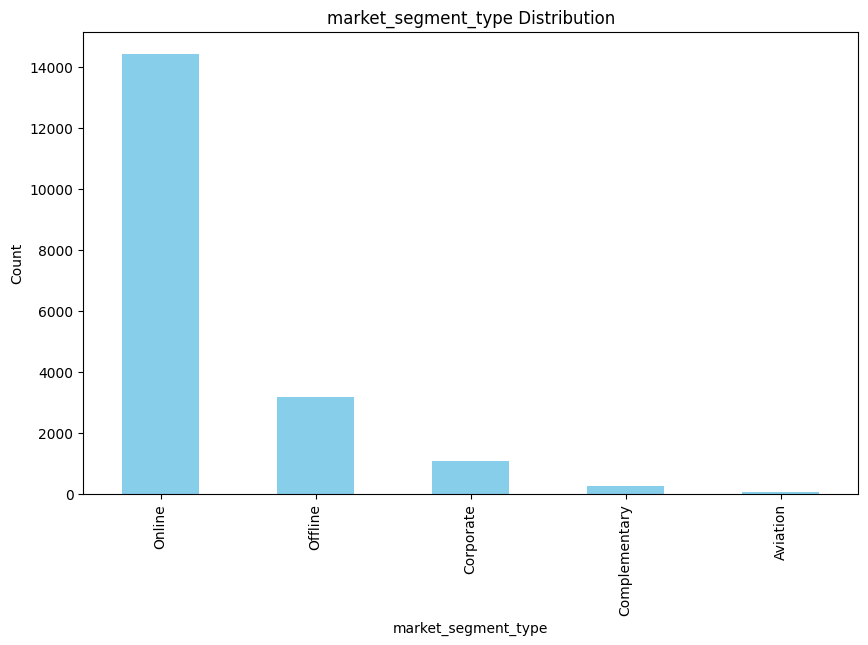

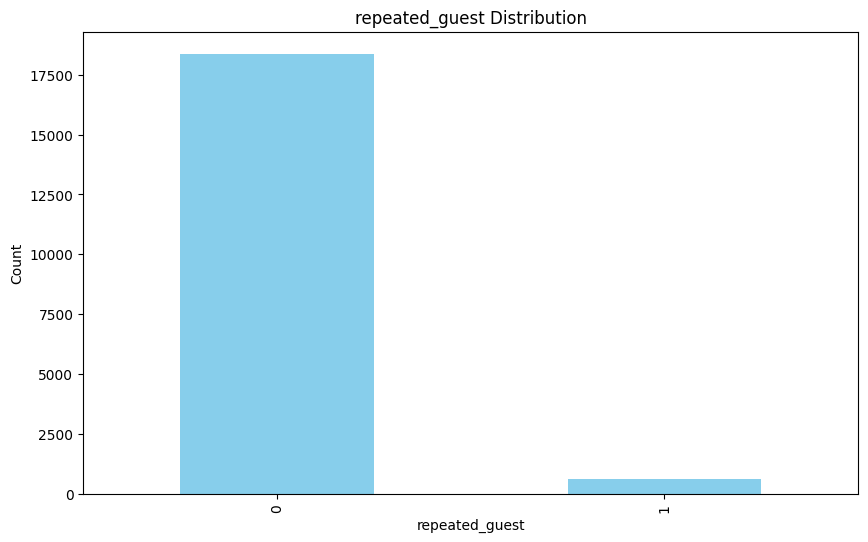

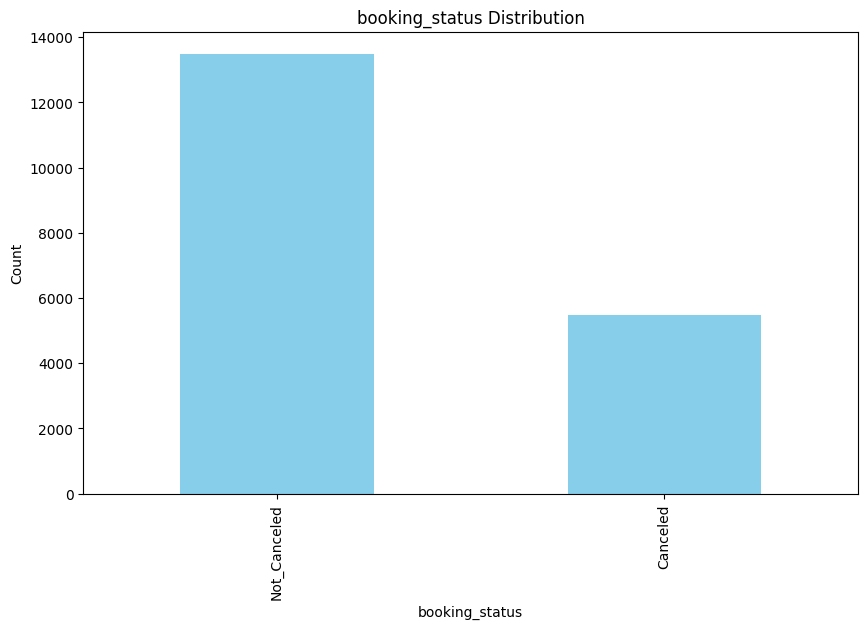

In [34]:
for cat_features in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_features].value_counts().plot(kind='bar',color='skyblue')
    plt.title(f"{cat_features} Distribution")
    plt.xlabel(cat_features)
    plt.ylabel("Count")
    plt.show()

In [35]:
# Bivariate Analysis - used to examine the relationship, correlation, or association between two variables (\(X\) and \(Y\)) to determine if, how, and to what extent they are related

In [36]:
# Bivariate Analysis of numerical variables.

In [37]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2
    fig, axes = plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes = axes.flatten()
    for i, column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i],data=df,palette='Blues')
        axes[i].set_title(f"{column} v/s the {target}")
    plt.tight_layout()
    plt.show()   

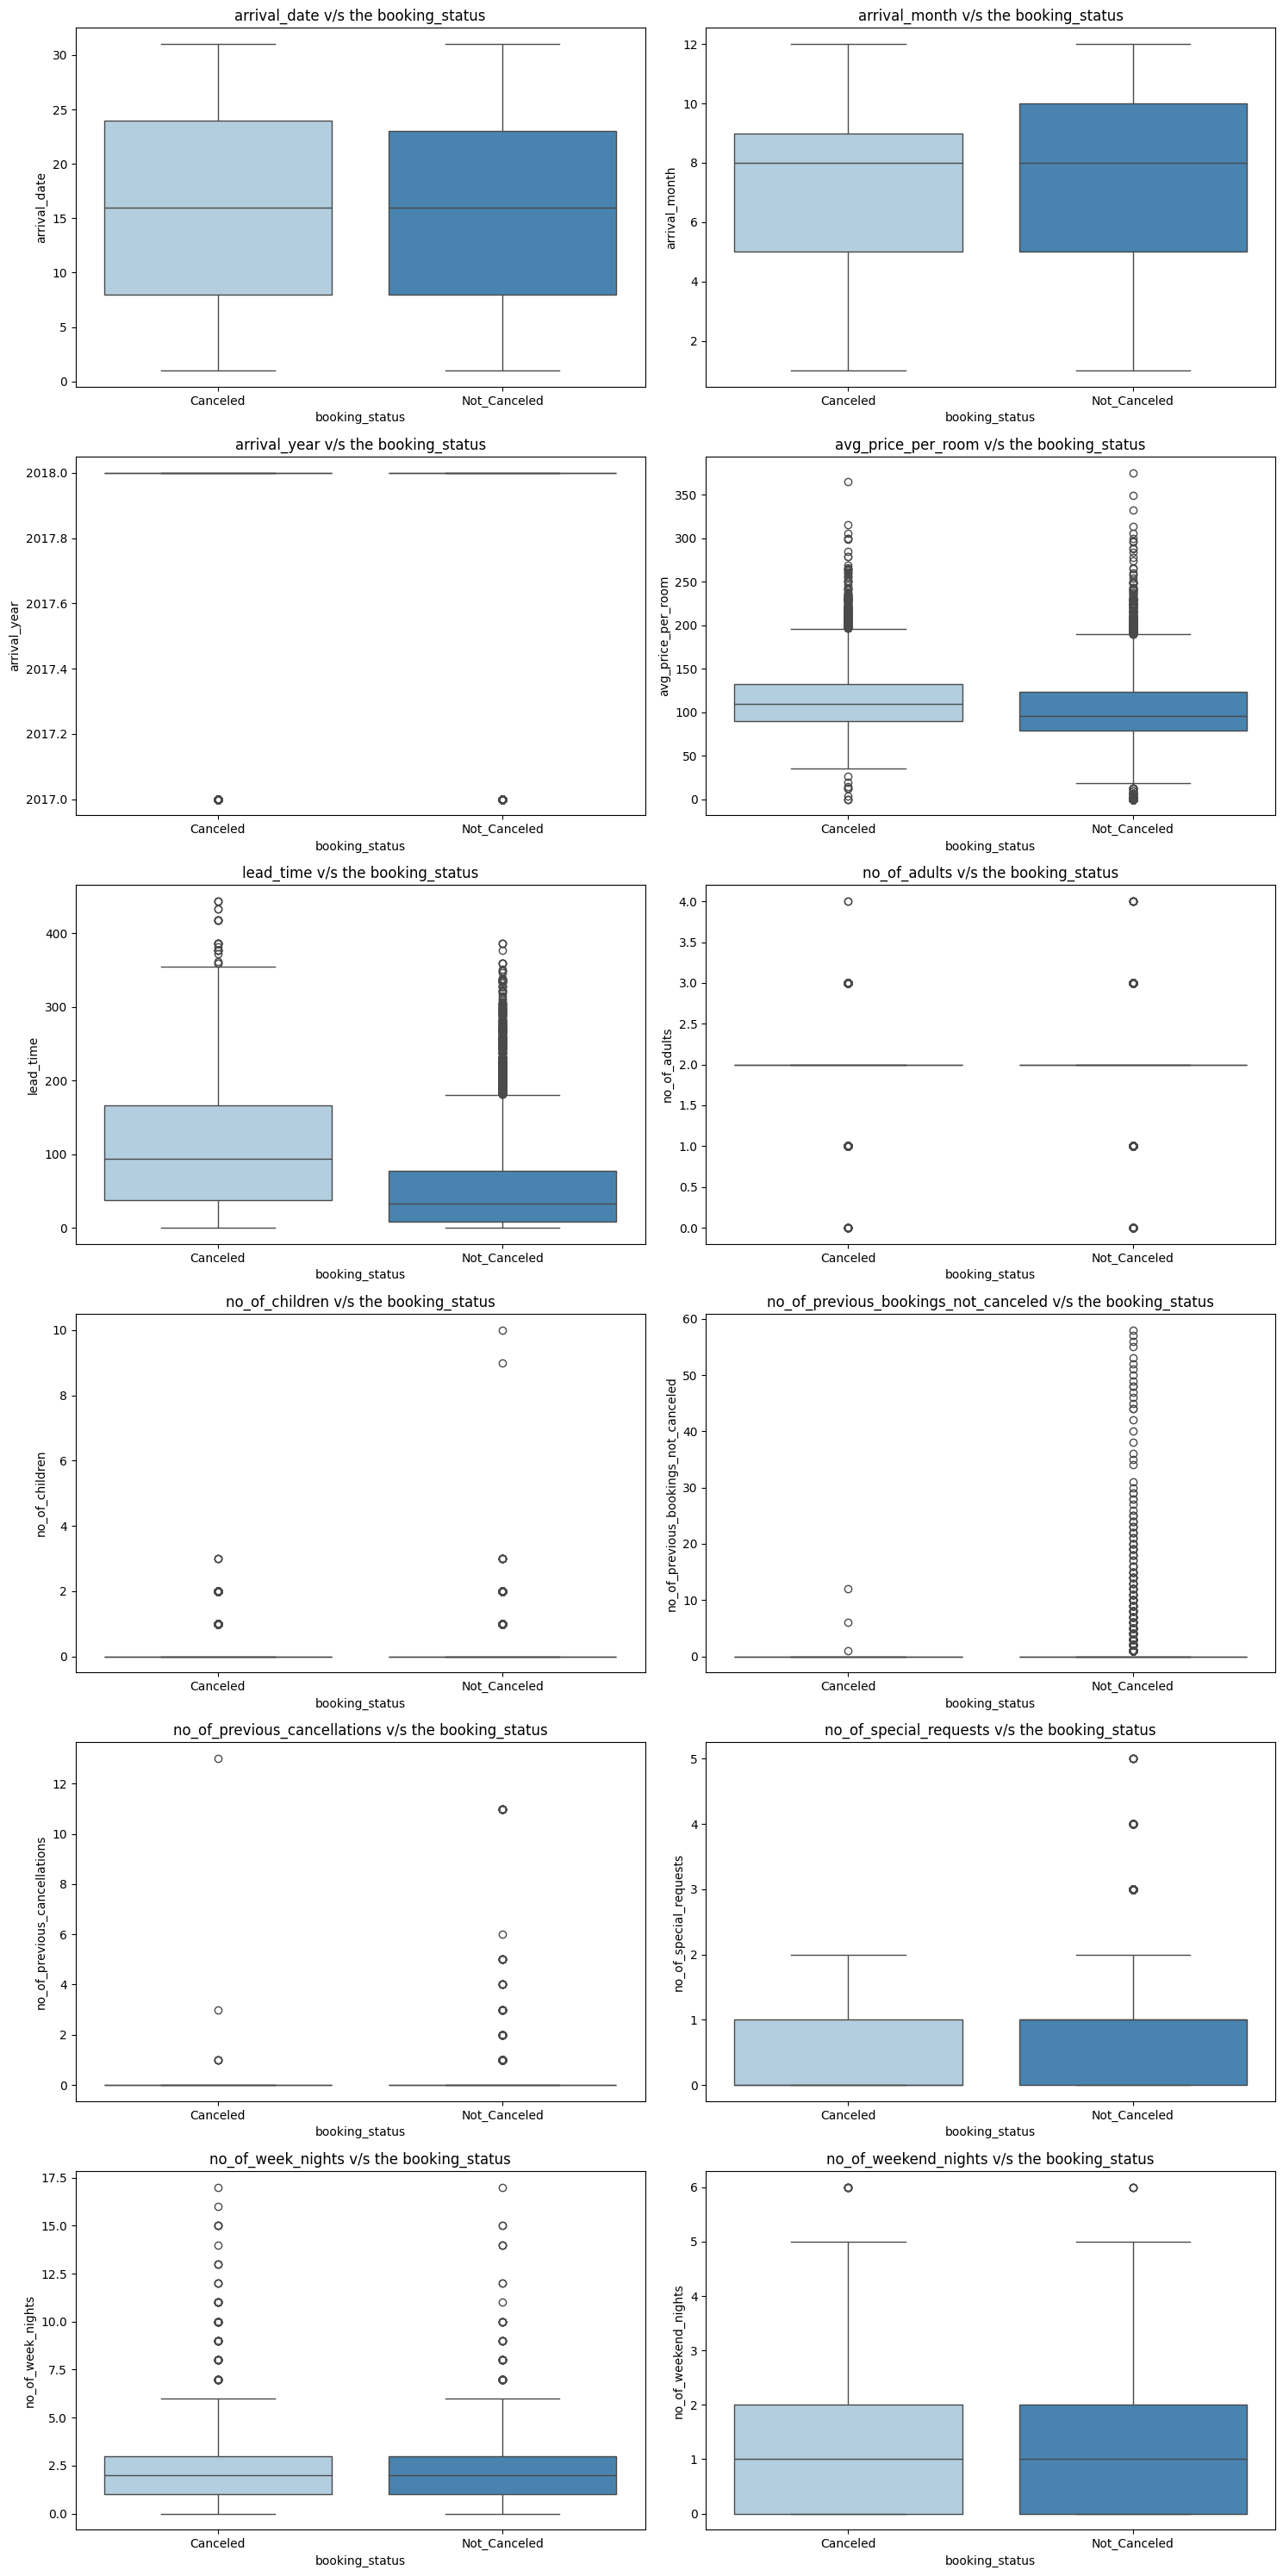

In [38]:
plot_bivariate_num(data,'booking_status',num_cols)

#### Conclusions from analysis:
1. Graph between lead time and booking status that there is huge variation in data when lead time is around 80 days booking is not cancelled, but when lead time is 100 or 200 plus then cancellation chances grow bigger.
2. In other variables there may be outliers that are imbalanced to one side that is cancelled or not cancelled. But, it is not influencing the target it can be ignored.

<Axes: xlabel='arrival_month', ylabel='avg_price_per_room'>

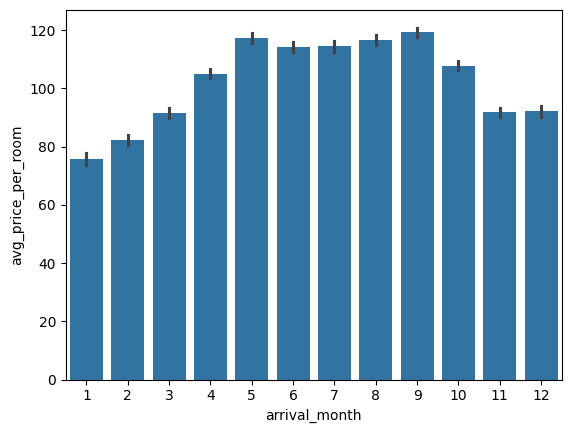

In [39]:
sns.barplot(x='arrival_month',y="avg_price_per_room",data=data)

If we consider the histogram that depicts the arrival_month and people count and the graph above we can see that it is almost similar. The hotels are charing more when there are less people visiting during certain months and charging more when more number of people are visiting the hotel.

In [40]:
# Bivariate Analysis of categorical variables:

In [41]:
def plot_bivariate_cat(df, target, cat_cols):
    num_features = len(cat_cols)
    num_rows = (num_features+1)//2
    fig,axes = plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes = axes = axes.flatten()
    for i, feature in enumerate(cat_cols):
        sns.countplot(x=feature,hue=target,data=df,palette="Set2",ax=axes[i])# countplot is usually used for univariate analysis but we use the parameter hue to make it bivariate
        axes[i].set_title(f"{feature} v/s {target}")
        axes[i].tick_params(axis='x',rotation=90)
    plt.tight_layout()
    plt.show()

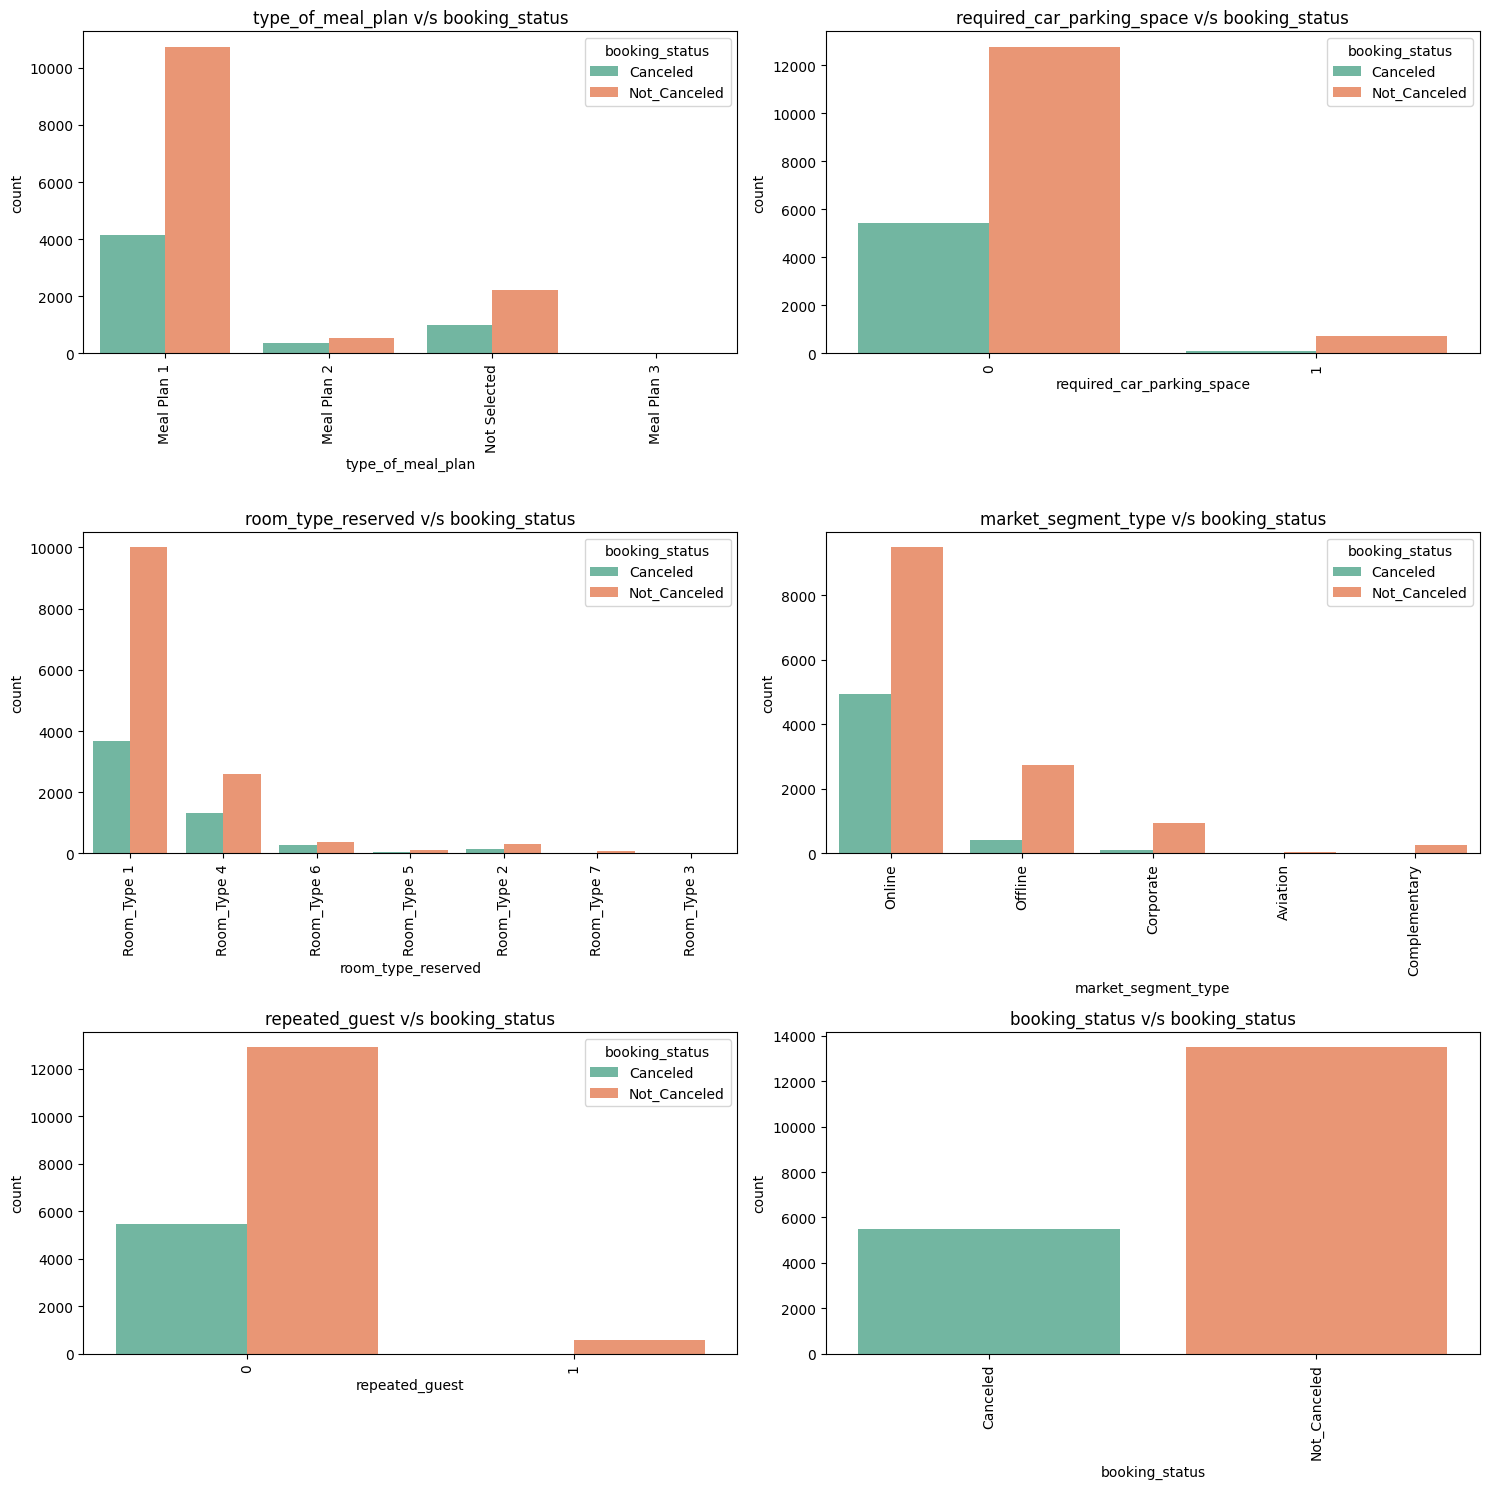

In [42]:
plot_bivariate_cat(data,"booking_status",cat_cols)

#### Observations:
1. From the graph type of meal plan v/s booking status we can say that people who take meal plan 2 are likely to cancel the booking.
2. From required car parking space v/s booking status we can say that if a person has opted for car parking space it is highly unlikely that he will cancel the reservation.
3. From room type reserved v/s booking status we can say that if a person is booking room 6 is likley that the person will cancel the booking. This inturn might cause losses for restaurant becuase room type 6 is deluxe rooms.
4. From market segment type graph we can say that if corporate is making reservations then it will not cancel the booking. But if the booking mode is online then there 50% chances that booking will be cancelled.
5. From repeated guest graph we can say that repeated guests are unlikley to cancel the booking.

### Data Processing

In [43]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,Canceled
1,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,Canceled
2,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,Not_Canceled
3,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,Not_Canceled
4,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,Not_Canceled


In [44]:
data.info()

<class 'pandas.DataFrame'>
Index: 18973 entries, 0 to 25391
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18973 non-null  int64  
 1   no_of_children                        18973 non-null  int64  
 2   no_of_weekend_nights                  18973 non-null  int64  
 3   no_of_week_nights                     18973 non-null  int64  
 4   type_of_meal_plan                     18973 non-null  str    
 5   required_car_parking_space            18973 non-null  int64  
 6   room_type_reserved                    18973 non-null  str    
 7   lead_time                             18973 non-null  int64  
 8   arrival_year                          18973 non-null  int64  
 9   arrival_month                         18973 non-null  int64  
 10  arrival_date                          18973 non-null  int64  
 11  market_segment_type            

In [45]:
# Label encoding to convert objects to int
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [46]:
mappings = {}
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}    

In [47]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [48]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,3,0,0,0,200,2018,8,29,4,0,0,0,90.95,0,0
1,2,0,1,3,0,0,0,79,2018,3,24,4,0,0,0,90.95,1,0
2,2,0,1,4,0,0,3,78,2018,4,6,4,0,0,0,99.45,1,1
3,2,0,2,0,0,0,0,61,2017,10,4,3,0,0,0,91.00,0,1
4,2,1,0,4,0,0,0,201,2018,11,1,4,0,0,0,82.28,3,1


In [49]:
data.info()

<class 'pandas.DataFrame'>
Index: 18973 entries, 0 to 25391
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18973 non-null  int64  
 1   no_of_children                        18973 non-null  int64  
 2   no_of_weekend_nights                  18973 non-null  int64  
 3   no_of_week_nights                     18973 non-null  int64  
 4   type_of_meal_plan                     18973 non-null  int64  
 5   required_car_parking_space            18973 non-null  int64  
 6   room_type_reserved                    18973 non-null  int64  
 7   lead_time                             18973 non-null  int64  
 8   arrival_year                          18973 non-null  int64  
 9   arrival_month                         18973 non-null  int64  
 10  arrival_date                          18973 non-null  int64  
 11  market_segment_type            

Checking for multi-collinearity

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # to detect multicollinearity
from statsmodels.tools.tools import add_constant

In [51]:
X = add_constant(data)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [52]:
vif_data

,feature
0,const
1,no_of_adults
2,no_of_children
3,no_of_weekend_nights
4,no_of_week_nights
5,type_of_meal_plan
6,required_car_parking_space
7,room_type_reserved
8,lead_time
9,arrival_year


In [53]:
# Calculate VIF for each variable
vif_data["VIF"] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]

In [54]:
vif_data

,feature,VIF
0,const,4.074059e+07
1,no_of_adults,1.339544e+00
2,no_of_children,1.284956e+00
3,no_of_weekend_nights,1.068835e+00
4,no_of_week_nights,1.118710e+00
5,type_of_meal_plan,1.177230e+00
6,required_car_parking_space,1.033964e+00
7,room_type_reserved,1.541363e+00
8,lead_time,1.403276e+00
9,arrival_year,1.291542e+00


Our data doesn't have any multicollinearity because most vif values are around 1 or 2 which is good. But say for example some values are around 5 or 10 then this is considered has highly multicollinearity

### Corelation matrix

In [55]:
corr = data.corr()

In [56]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.051819,0.093811,0.112496,-0.003559,0.005164,0.273689,0.147095,0.097696,0.006053,0.018327,0.307617,-0.234489,-0.065682,-0.141818,0.326481,0.156862,-0.097327
no_of_children,-0.051819,1.000000,0.013134,0.021767,-0.103181,0.022626,0.351109,0.009345,0.038971,0.004408,0.028827,0.104566,-0.047535,-0.020934,-0.028747,0.354222,0.097375,-0.060315
no_of_weekend_nights,0.093811,0.013134,1.000000,0.212195,-0.039006,-0.052987,0.028763,0.130422,0.032518,0.006985,0.008914,0.091490,-0.088498,-0.026727,-0.037541,-0.004996,0.012986,-0.066609
no_of_week_nights,0.112496,0.021767,0.212195,1.000000,-0.073498,-0.064095,0.087154,0.221049,0.026112,0.028419,-0.001526,0.112943,-0.113922,-0.033038,-0.050076,0.017012,0.027508,-0.119354
type_of_meal_plan,-0.003559,-0.103181,-0.039006,-0.073498,1.000000,-0.024063,-0.244888,-0.055963,0.093067,0.010872,-0.004382,0.186335,-0.073094,-0.018710,-0.043269,-0.096934,-0.010107,-0.032669
required_car_parking_space,0.005164,0.022626,-0.052987,-0.064095,-0.024063,1.000000,0.018764,-0.047533,0.010386,-0.011600,-0.005993,-0.033539,0.102647,0.017736,0.053136,0.061033,0.073777,0.092353
room_type_reserved,0.273689,0.351109,0.028763,0.087154,-0.244888,0.018764,1.000000,-0.016006,0.091937,0.006130,0.025047,0.087602,-0.044869,-0.018173,-0.024052,0.486555,0.088239,-0.073436
lead_time,0.147095,0.009345,0.130422,0.221049,-0.055963,-0.047533,-0.016006,1.000000,0.169698,0.128833,0.031352,0.135281,-0.148564,-0.054560,-0.086038,-0.045451,-0.017754,-0.369749
arrival_year,0.097696,0.038971,0.032518,0.026112,0.093067,0.010386,0.091937,0.169698,1.000000,-0.324103,0.014571,0.114854,-0.012120,0.009860,0.025397,0.179925,-0.001880,-0.151624
arrival_month,0.006053,0.004408,0.006985,0.028419,0.010872,-0.011600,0.006130,0.128833,-0.324103,1.000000,-0.022369,-0.018111,0.004039,-0.040261,-0.002097,0.063953,0.135984,0.017645


<Axes: >

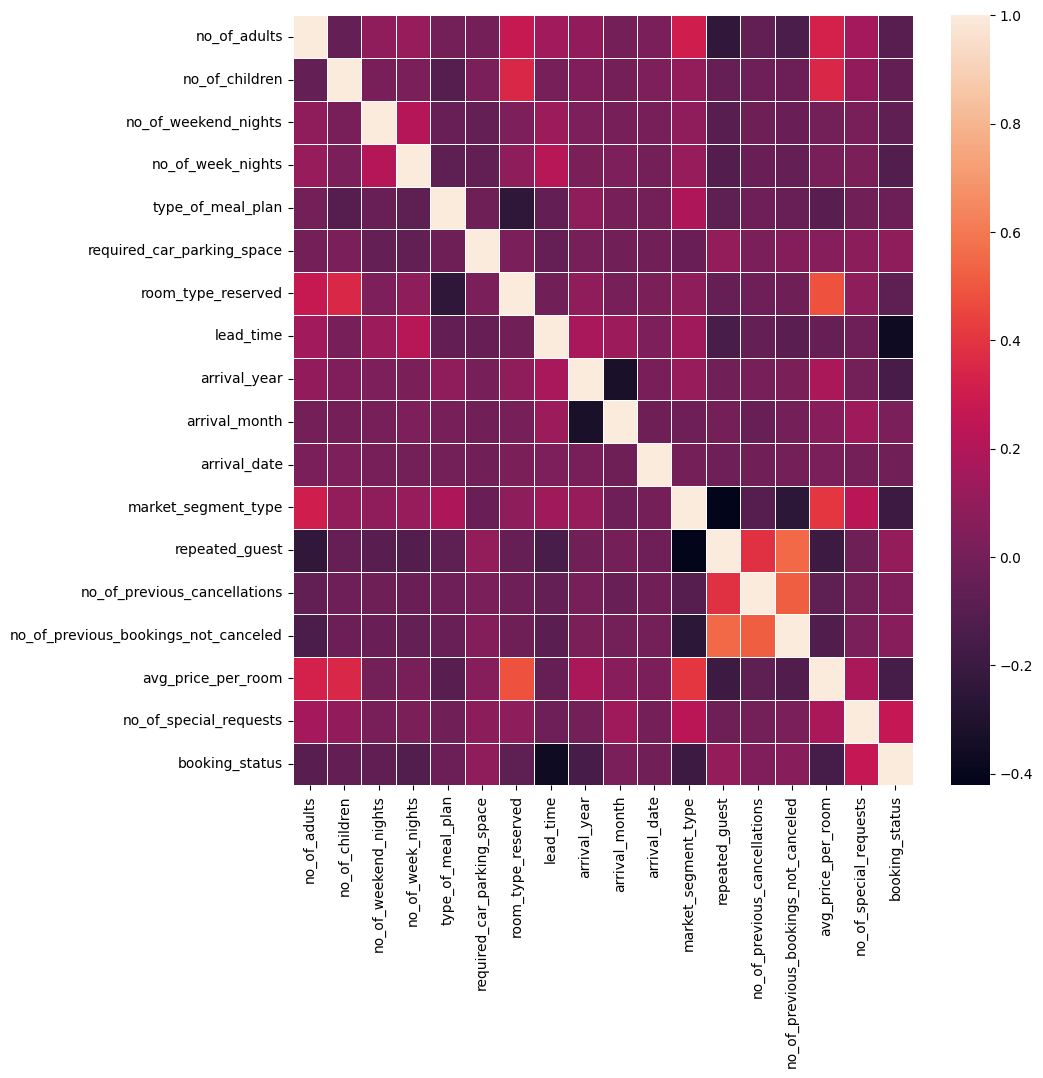

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,linewidths=0.5)

when the color of the box is near to white means the data is +vely correlated. If it is closer to dark color then it is -vely correlated. If the color is arounf reddish then it is considered neutral.

Checking for skewness

In [58]:
skewness = data.skew()

In [59]:
skewness

no_of_adults                            -0.304395
no_of_children                           4.072963
no_of_weekend_nights                     0.612996
no_of_week_nights                        1.506668
type_of_meal_plan                        1.656324
required_car_parking_space               4.616114
room_type_reserved                       1.400804
lead_time                                1.404721
arrival_year                            -1.935855
arrival_month                           -0.295514
arrival_date                             0.004155
market_segment_type                     -2.313089
repeated_guest                           5.378136
no_of_previous_cancellations            22.073888
no_of_previous_bookings_not_canceled    16.912023
avg_price_per_room                       0.560381
no_of_special_requests                   0.943367
booking_status                          -0.931934
dtype: float64

We can see that no_of_previous_cancellations and no_of_previous_bookings_not_canceled are highly positively skewed. So we do log transformation to fix this.

In [60]:
for col in data.columns:
    if skewness[col] > 5.0:
        data[col] = np.log1p(data[col])

In [61]:
data.skew()

no_of_adults                            -0.304395
no_of_children                           4.072963
no_of_weekend_nights                     0.612996
no_of_week_nights                        1.506668
type_of_meal_plan                        1.656324
required_car_parking_space               4.616114
room_type_reserved                       1.400804
lead_time                                1.404721
arrival_year                            -1.935855
arrival_month                           -0.295514
arrival_date                             0.004155
market_segment_type                     -2.313089
repeated_guest                           5.378136
no_of_previous_cancellations            13.335657
no_of_previous_bookings_not_canceled     7.766941
avg_price_per_room                       0.560381
no_of_special_requests                   0.943367
booking_status                          -0.931934
dtype: float64

Now skewness are reduced by significant number

### Handling imbalanced data

In [62]:
data.booking_status.value_counts()

booking_status
1    13493
0     5480
Name: count, dtype: int64

We can see the imbalance in the data. Difference between cancelled and not cancelled is two times.

In [63]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [64]:
# 0 - Canceled; 1 - Not Canceled

If we do undersampling in this case because we only have about 20k data samples. If we do undersampling then the dataset will get reduced to approx 12k. So we do oversampling then we will get around 30k data and our data imbalance will be fixed.

In [65]:
X = data.drop(columns="booking_status")
y = data["booking_status"]

In [66]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,3,0,0,0,200,2018,8,29,4,0.0,0.0,0.0,90.95,0
1,2,0,1,3,0,0,0,79,2018,3,24,4,0.0,0.0,0.0,90.95,1
2,2,0,1,4,0,0,3,78,2018,4,6,4,0.0,0.0,0.0,99.45,1
3,2,0,2,0,0,0,0,61,2017,10,4,3,0.0,0.0,0.0,91.00,0
4,2,1,0,4,0,0,0,201,2018,11,1,4,0.0,0.0,0.0,82.28,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25384,3,0,0,1,0,0,3,65,2018,6,21,4,0.0,0.0,0.0,132.30,0
25385,2,0,2,3,0,0,0,86,2018,6,17,4,0.0,0.0,0.0,126.90,1
25386,2,0,0,2,0,0,3,0,2018,10,12,4,0.0,0.0,0.0,139.50,1
25387,2,0,2,2,0,0,0,43,2017,12,26,3,0.0,0.0,0.0,55.00,2


In [67]:
y

0        0
1        0
2        1
3        1
4        1
        ..
25384    0
25385    1
25386    1
25387    1
25391    1
Name: booking_status, Length: 18973, dtype: int64

In [68]:
y.value_counts()

booking_status
1    13493
0     5480
Name: count, dtype: int64

Applying smote technique

In [69]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [70]:
X_res, y_res = smote.fit_resample(X,y)

In [71]:
y_res.value_counts()

booking_status
0    13493
1    13493
Name: count, dtype: int64

After applying smote data is balanced

In [72]:
data.shape

(18973, 18)

We can see that the original data variable still contains the imbalanced dataset

In [73]:
balanced_data = pd.DataFrame(X_res,columns=X.columns)
balanced_data["booking_status"] = y_res

In [74]:
balanced_data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,3,0,0,0,200,2018,8,29,4,0.0,0.0,0.0,90.950000,0,0
1,2,0,1,3,0,0,0,79,2018,3,24,4,0.0,0.0,0.0,90.950000,1,0
2,2,0,1,4,0,0,3,78,2018,4,6,4,0.0,0.0,0.0,99.450000,1,1
3,2,0,2,0,0,0,0,61,2017,10,4,3,0.0,0.0,0.0,91.000000,0,1
4,2,1,0,4,0,0,0,201,2018,11,1,4,0.0,0.0,0.0,82.280000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26981,2,1,1,3,0,0,4,227,2018,11,29,4,0.0,0.0,0.0,135.809216,1,0
26982,2,0,0,1,2,0,0,3,2018,7,3,4,0.0,0.0,0.0,148.392527,0,0
26983,3,0,2,1,0,0,5,60,2018,6,10,4,0.0,0.0,0.0,255.333514,0,0
26984,2,0,0,1,2,0,0,49,2018,5,6,4,0.0,0.0,0.0,116.100000,0,0


In [75]:
balanced_data.shape

(26986, 18)

In [76]:
data = balanced_data.copy()

In [77]:
data.shape

(26986, 18)

### Feature Selection

In [78]:
len(data.columns)

18

We have 18 columns in which 17 are inputs and 1 is our target. For example, if we are getting 90% accuracy from the model using 17 input columns and we are getting same accuracy with 10 columns its not usefull to use 17 columns. Hence we need to be selective.

In [79]:
# Random forest Feature selection technique
from sklearn.ensemble import RandomForestClassifier
X = data.drop(columns="booking_status")
y = data["booking_status"]

In [80]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [81]:
model.feature_importances_

array([0.01875767, 0.00664777, 0.0289391 , 0.04566245, 0.02128384,
       0.01138409, 0.01995078, 0.26287029, 0.01710007, 0.08789962,
       0.08370306, 0.05399016, 0.00668076, 0.0003162 , 0.0031151 ,
       0.14878546, 0.18291359])

In [82]:
feature_importance = model.feature_importances_

In [83]:
feature_importance_df = pd.DataFrame({
    "feature":X.columns,
    "importance":feature_importance
})

In [84]:
top_features = feature_importance_df.sort_values(by="importance",ascending=False)

In [85]:
top_features

,feature,importance
7,lead_time,0.262870
16,no_of_special_requests,0.182914
15,avg_price_per_room,0.148785
9,arrival_month,0.087900
10,arrival_date,0.083703
11,market_segment_type,0.053990
3,no_of_week_nights,0.045662
2,no_of_weekend_nights,0.028939
4,type_of_meal_plan,0.021284
6,room_type_reserved,0.019951


In [86]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='str')

In [89]:
top_10_features = top_features["feature"].head(10).values
top_10_data = data[top_10_features.tolist()+["booking_status"]]

In [90]:
top_10_data.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,200,0,90.95,8,29,4,3,1,0,0,0
1,79,1,90.95,3,24,4,3,1,0,0,0
2,78,1,99.45,4,6,4,4,1,0,3,1
3,61,0,91.00,10,4,3,0,2,0,0,1
4,201,3,82.28,11,1,4,4,0,0,0,1


In [91]:
len(top_10_data.columns)

11

In [92]:
data = top_10_data.copy()

Eliminating the unwanted 8 columns and keeping top 10 columns with the target columns

### Model selection

In [93]:
!pip install xgboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [lightgbm]

[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: pip install --upgrade pip


In [94]:
# we are choosing multiple libraries because we want to see the accuracy of the model without hyper parameter tuning.
# Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics to measure accuracy
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [95]:
X = data.drop(columns="booking_status")
y = data["booking_status"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
classifiers = {
    "RandomForestClassifier":RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=42),
    "SVC":SVC(random_state=42),
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "Naive_Bayes":GaussianNB(),
    "XGboost":XGBClassifier(random_state=42),
    "AdaBoostClassifier":AdaBoostClassifier(random_state=42),
    "LGBM":LGBMClassifier(random_state=42)
}

In [98]:
metrics = {
    "Model":[],
    "Accuracy":[],
    "precision":[],
    "Recall":[],
    "F1_Score":[]
}

In [99]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1_Score"].append(f1)

[LightGBM] [Info] Number of positive: 10779, number of negative: 10809
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 21588, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499305 -> initscore=-0.002779
[LightGBM] [Info] Start training from score -0.002779


In [100]:
metrics_df = pd.DataFrame(metrics)

In [101]:
metrics_df

,Model,Accuracy,precision,Recall,F1_Score
0,RandomForestClassifier,0.879770,0.882833,0.877303,0.880059
1,LogisticRegression,0.764357,0.791903,0.720707,0.754630
2,GradientBoostingClassifier,0.832531,0.830775,0.837509,0.834128
3,SVC,0.708411,0.719062,0.689388,0.703913
4,DecisionTreeClassifier,0.833272,0.838433,0.827929,0.833148
5,KNeighborsClassifier,0.769544,0.839335,0.669860,0.745082
6,Naive_Bayes,0.772323,0.800729,0.728445,0.762879
7,XGboost,0.861986,0.865849,0.858511,0.862165
8,AdaBoostClassifier,0.798629,0.804568,0.791820,0.798143
9,LGBM,0.858096,0.851118,0.869934,0.860423


Selecting Random Forest because it has the highest accuracy

In [102]:
# Training the Random Forest Model

In [103]:
# for hyper parametr tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [104]:
X = data.drop(columns="booking_status")
y = data["booking_status"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [105]:
rf = RandomForestClassifier(random_state=42)

In [109]:
params_dist = {
    'n_estimators': randint(100,500),
    "max_depth": randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,5),
    'bootstrap': [True, False],
}

In [110]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=1,
    random_state=42,
    scoring='accuracy'
)

In [111]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': [True, False], 'max_depth': <scipy.stats....t 0x309e6f770>, 'min_samples_leaf': <scipy.stats....t 0x309e93ce0>, 'min_samples_split': <scipy.stats....t 0x309e93ac0>, ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",5
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the var

In [112]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [113]:
best_rf_model = random_search.best_estimator_

In [114]:
y_pred = best_rf_model.predict(X_test)

In [115]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

Without parameters:
Accuracy: 0.879770,	precision: 0.882833, Recall: 0.877303, F1_Score: 0.880059

In [116]:
accuracy

0.8756947017413858

In [117]:
precision

0.8743129351410773

In [118]:
recall

0.8791451731761238

In [119]:
f1

0.8767223957376447

We can conclude that there is no significant increase in accuracy. If we increase number of iterations, probably we will get optimal result.

Saving the model using joblib

In [120]:
import joblib

In [121]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [122]:
# Loading the model
loaded_model = joblib.load("random_forest.pkl")

In [123]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
20322,40,0,207.978048,8,12,4,2,0,0,5


In [126]:
new_data = np.array([190,1,93.5,9,8,4,5,2,0,0]).reshape(1,-1)

In [127]:
pred = loaded_model.predict(new_data)

In [128]:
pred

array([1])

The size of random_forest.pkl is around 160 mb it will be similar for xgboost so we will use light GBM model. In this model the final size will be around 4mb which is significant.